In [1]:
import sys
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pickle 

In [2]:
import Online_DA_utils as oda

In [3]:
output_dir = '/home/disk/kalman2/mkb22/Online_DA/experiments/'
output_dir_times ='/home/disk/kalman2/mkb22/Online_DA/experiments/ODA_hadcrut_CESM_LME/'

#timename = 'Time_'+str(t)+'.pkl'
filename = 'ODA_hadcrut_CESM_LME_t_0_13cov_forecasted_sqrtWt.pkl'

In [4]:
data = pickle.load(open(output_dir+filename,"rb"))

In [5]:
data.keys()

dict_keys(['obs', 'Xa', 'mse_xb', 'mse_xa', 'time'])

In [6]:
data['Xa'].shape

(13, 35424)

In [7]:
LIM = oda.load_L('cesm_lme_Amon')
LIMd = LIM['LIMd']
LIMd.keys()

Loading: /home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/master/LIMcast_cesm_lme_Amon_ntrain_850_1650_cesm_lme_Amon_validy_1651_1850_tas50L0.1_psl50L0.1_zg50L0.1_tos50L0.1_sit50L40_sic50L40_20211202_sqrtWt.pkl


dict_keys(['vec', 'veci', 'val', 'lam_L', 'C_0', 'C_1', 'Gt', 'lam_L_adj', 'npos_eigenvalues', 'E3', 'W_all', 'standard_factor', 'E3_all', 'E_sic', 'var_dict', 'P_train', 'exp_setup', 'frac_neg_eigenvals'])

In [8]:
Xa_tas = data['Xa'][:,LIMd['var_dict']['tas']['var_inds']]

Xa_tas_3d = np.reshape(Xa_tas,(13,48,144))

In [16]:
data['obs'][4]['obs_lat'].shape

(259,)

In [10]:
cesmdir = '/home/disk/chaos/mkb22/Documents/SeaIceData/LME/LIMs/'
filename = 'tas_sfc_Amon_CESM_LMEallforc_001_085001-200512.nc'
data_cesm_lme = xr.open_dataset(cesmdir+filename)
cesm_lat = data_cesm_lme.lat.values
cesm_lat_nh = cesm_lat[48:]
cesm_lon = data_cesm_lme.lon.values

7.0


Text(0.5, 1.0, 'Analysis vs. HadCRUT Observations: time = 0')

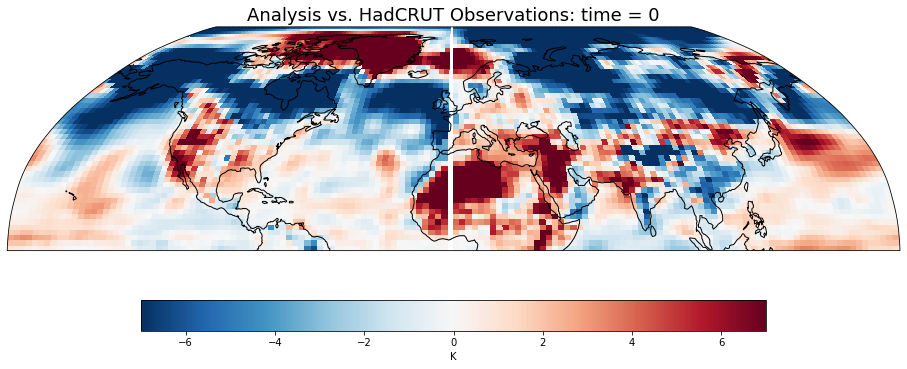

In [27]:
t = 0

fig = plt.figure(1, figsize=(16, 6))
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()

obs_lon1 = data['obs'][t]['obs_lon']
obs_lat1 = data['obs'][t]['obs_lat']
obs1 = data['obs'][t]['obs']

lim = np.ceil(max(np.abs(obs1.min()), np.abs(obs1.max())))
print(lim)

axs.pcolormesh(cesm_lon,cesm_lat_nh,Xa_tas_3d[t,:,:],
               cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin=-lim, vmax=lim)

# cb = axs.scatter(obs_lon1,obs_lat1,
#                  s=40,c=obs1,cmap='RdBu_r',edgecolor='k',
#                  transform=ccrs.PlateCarree(),vmin=-lim, vmax=lim)

plt.colorbar(cb, orientation='horizontal', shrink=0.7, label='K')
plt.title('Analysis vs. HadCRUT Observations: time = '+str(t), fontsize=18)

In [21]:
data['obs'][0]['obs'].shape

(259,)

Text(0.5, 1.0, 'Analysis vs. HadCRUT Observations: time = 1')

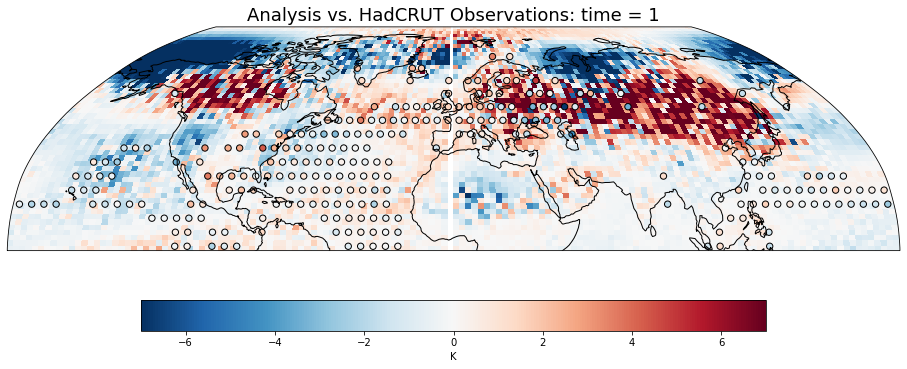

In [24]:
t = 1

fig = plt.figure(1, figsize=(16, 6))
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()

obs_lon = data['obs'][t]['obs_lon']
obs_lat = data['obs'][t]['obs_lat']
obs = data['obs'][t]['obs']

lim = np.ceil(max(np.abs(obs.min()), np.abs(obs.max())))

axs.pcolormesh(cesm_lon,cesm_lat_nh,Xa_tas_3d[t,:,:]/100,
               cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin=-lim, vmax=lim)

cb = axs.scatter(obs_lon,obs_lat,
                 s=40,c=obs,cmap='RdBu_r',edgecolor='k',
                 transform=ccrs.PlateCarree(),vmin=-lim, vmax=lim)

plt.colorbar(cb, orientation='horizontal', shrink=0.7, label='K')
plt.title('Analysis vs. HadCRUT Observations: time = '+str(t), fontsize=18)

Text(0.5, 1.0, 'Analysis vs. HadCRUT Observations: time = 12')

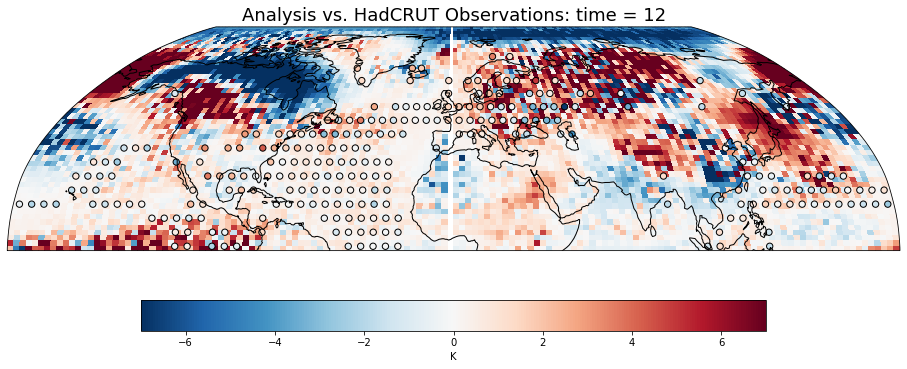

In [26]:
t = 12

fig = plt.figure(1, figsize=(16, 6))
axs = plt.axes(projection=ccrs.Robinson())
axs.coastlines()

obs_lon = data['obs'][t]['obs_lon']
obs_lat = data['obs'][t]['obs_lat']
obs = data['obs'][t]['obs']

lim = np.ceil(max(np.abs(obs.min()), np.abs(obs.max())))

axs.pcolormesh(cesm_lon,cesm_lat_nh,Xa_tas_3d[t,:,:]/100,
               cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin=-lim, vmax=lim)

cb = axs.scatter(obs_lon,obs_lat,
                 s=40,c=obs,cmap='RdBu_r',edgecolor='k',
                 transform=ccrs.PlateCarree(),vmin=-lim, vmax=lim)

plt.colorbar(cb, orientation='horizontal', shrink=0.7, label='K')
plt.title('Analysis vs. HadCRUT Observations: time = '+str(t), fontsize=18)

In [59]:
np.ceil(max(np.abs(obs.min()), np.abs(obs.max())))

7.0

In [18]:
HadCRUT_tas, HadCRUT_lat, HadCRUT_lon, HadCRUT_time = oda.load_HadCRUT5()
HadCRUT_lon[:36] = HadCRUT_lon[:36] +360

HadCRUT_tas_nh = HadCRUT_tas[:,18:,:]
HadCRUT_lat_nh = HadCRUT_lat[18:]

nobs_had = np.isfinite(HadCRUT_tas_nh[0,:,:]).sum()

HadCRUT_lat_2d = HadCRUT_lat_nh[:,np.newaxis]*np.ones((HadCRUT_lat_nh.shape[0],HadCRUT_lon.shape[0]))
HadCRUT_lon_2d = np.ones((HadCRUT_lat_nh.shape[0],HadCRUT_lon.shape[0]))*HadCRUT_lon[np.newaxis,:]

HadCRUT_obs_1d = HadCRUT_tas_nh[t,np.isfinite(HadCRUT_tas_nh[t,:,:])]
HadCRUT_obs_lat = HadCRUT_lat_2d[np.isfinite(HadCRUT_tas_nh[t,:,:])]
HadCRUT_obs_lon = HadCRUT_lon_2d[np.isfinite(HadCRUT_tas_nh[t,:,:])]

In [88]:
t=0

HadCRUT_tas_nh[t,np.isfinite(HadCRUT_tas_nh[t,:,:])].shape

(271,)

In [19]:
 HadCRUT_tas_nh[t,np.isfinite(HadCRUT_tas_nh[t,:,:])].shape

(271,)